# Classification-2

## Naive Bayes Classifier

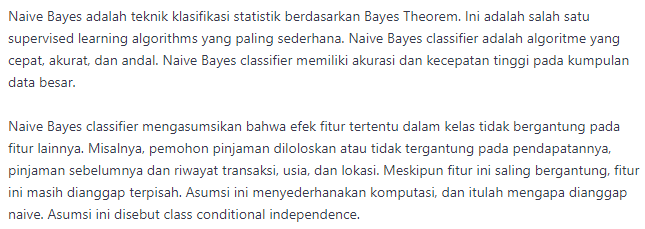

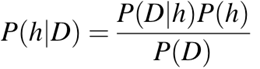

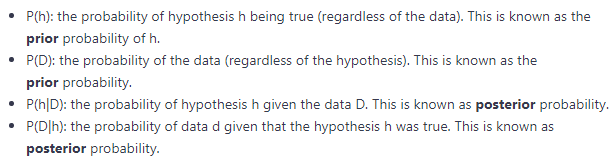

### How Naive Bayes Classifier works?

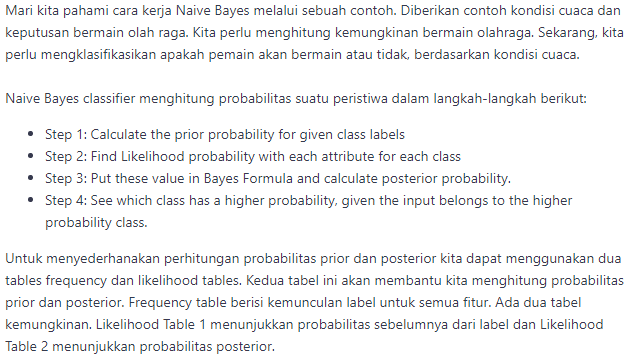

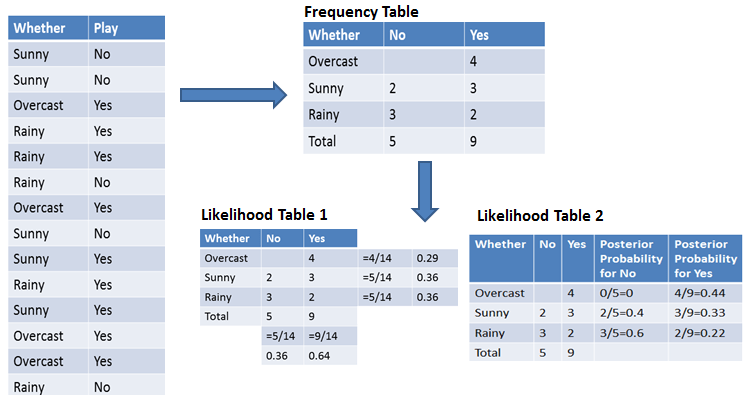

Sekarang misalkan kita ingin menghitung probabilitas bermain (**Yes**/**No**) saat cuaca mendung (**Overcast**)

#### Probability of playing :

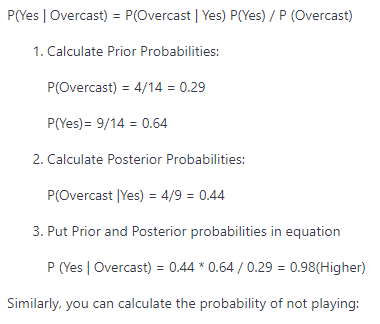

#### Probability of not playing :

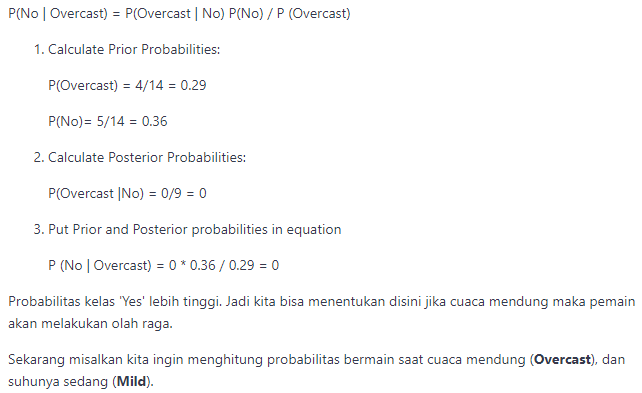

####  Probability of playing

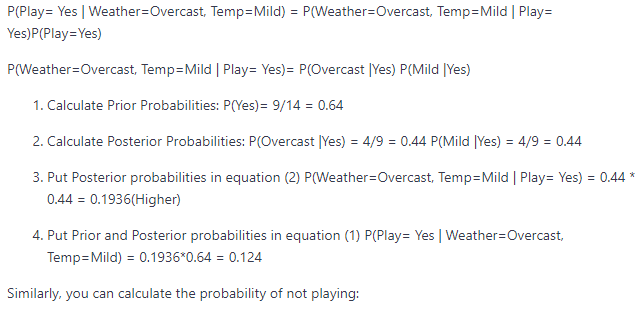

#### Probability of not playing :

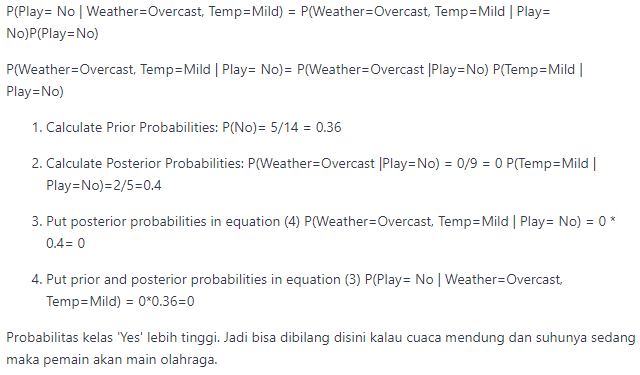

### Naive Bayes Classifier Building in Scikit-learn

#### Defining Dataset 

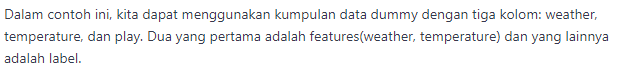

In [1]:
# Assigning features and label variables

# First Feature
weather = ['Sunny', 
           'Sunny', 
           'Overcast', 
           'Rainy', 
           'Rainy', 
           'Overcast', 
           'Sunny', 
           'Sunny', 
           'Rainy', 
           'Sunny', 
           'Overcast', 
           'Overcast', 
           'Rainy']

# Second Feature
temp = ['Hot', 
        'Hot', 
        'Hot', 
        'Mild',
        'Cool', 
        'Cool', 
        'Cool', 
        'Mild', 
        'Cool', 
        'Mild', 
        'Mild', 
        'Mild', 
        'Hot']

# Label or Target varible
play = ['No', 
        'No', 
        'Yes', 
        'Yes', 
        'Yes', 
        'No', 
        'Yes', 
        'No', 
        'Yes', 
        'Yes', 
        'Yes', 
        'Yes', 
        'Yes']

#### Encoding Features

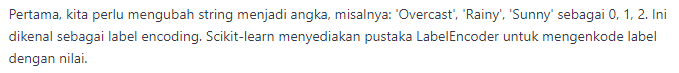

In [2]:
from sklearn import preprocessing

# Creating labelendcoder
le = preprocessing.LabelEncoder()

# Converting weather
weather_endcoded = le.fit_transform(weather)

print(weather_endcoded)

[2 2 0 1 1 0 2 2 1 2 0 0 1]


In [5]:
# Converting temp
temp_endcoded = le.fit_transform(temp)

print("Temp : ", temp_endcoded)


# Converting play
label = le.fit_transform(play)

print("Label : ",label)

Temp :  [1 1 1 2 0 0 0 2 0 2 2 2 1]
Label :  [0 0 1 1 1 0 1 0 1 1 1 1 1]


In [6]:
# Combining weather and temp into single listof tuple
features = list(zip(weather_endcoded, temp_endcoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (0, 0), (2, 0), (2, 2), (1, 0), (2, 2), (0, 2), (0, 2), (1, 1)]


In [7]:
# Import Gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features, label)

# Predict output
predict = model.predict([[0, 2]]) # 0: Overcast, 2: Mild
print("Predict value : ", predict)

Predict value :  [1]


### Naive Bayes with Multiple labels 

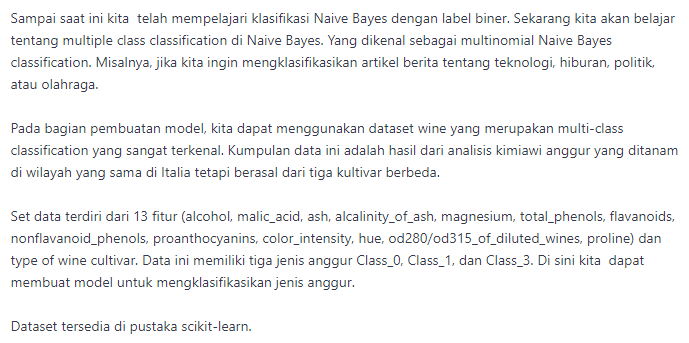

#### Loading Data

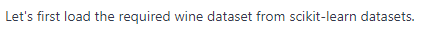

In [1]:
from sklearn import datasets

# load dataset
wine = datasets.load_wine()

In [3]:
# Print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine (class_0, class_1, class_2)
print("labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
labels:  ['class_0' 'class_1' 'class_2']


In [5]:
wine.data.shape

(178, 13)

In [6]:
# Print the wine data features (top 5 records)
print(wine.data[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [7]:
# print the wine labels (0: class_0, 1: class_1, 2: class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.3, random_state=109)

In [11]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [12]:
# Import scikit-learn metrics model for accuracy calculation
from sklearn import metrics

# Model accuracy, how often is the classifier correct?
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9074074074074074


## Decision Tree Classifier

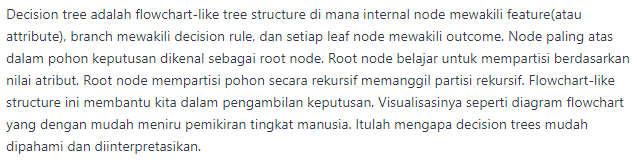

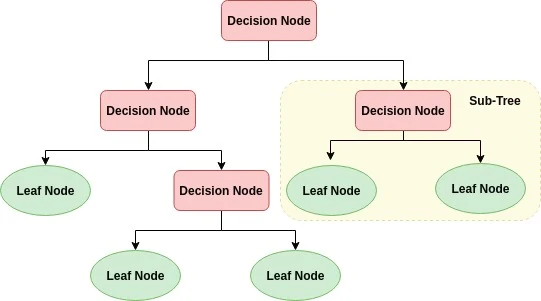

### How does the Decision Tree algorithm work?

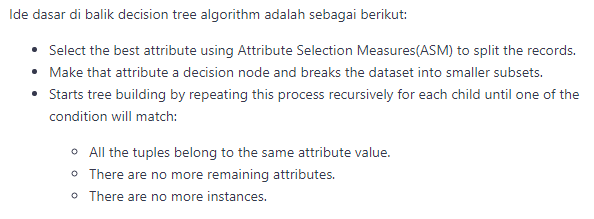

### Decision Tree Classifier Building in Scikit-learn

In [14]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [16]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


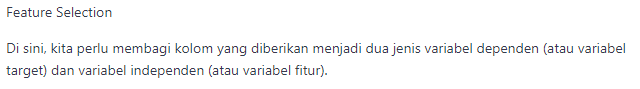

In [18]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [19]:
numer = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree', 'label']

for col in numer :
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [20]:
pima.dropna(inplace=True)

In [21]:
# Split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols] # Features
y = pima.label #target variable

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1) # 70% training and 30% test

In [23]:
# Create Decision Tree
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the respose for test dataset
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6883116883116883


### Visualizing Decision Tree

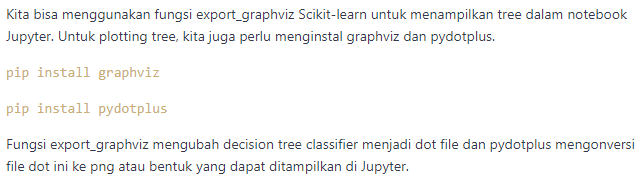

In [35]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, class_names=['0', '1'], feature_names=feature_cols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

### Optimizing Decision Tree Perfromance

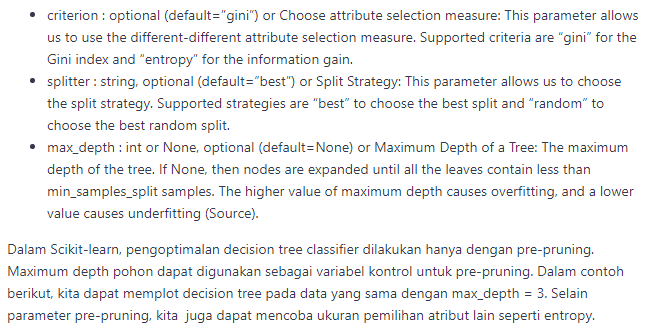

In [36]:
# Create Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the respose for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7705627705627706


In [37]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, class_names=['0', '1'], feature_names=feature_cols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

## Random Forest

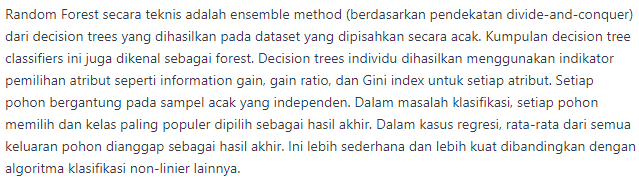

### How does the algorithm work?

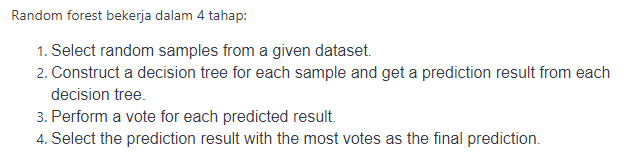

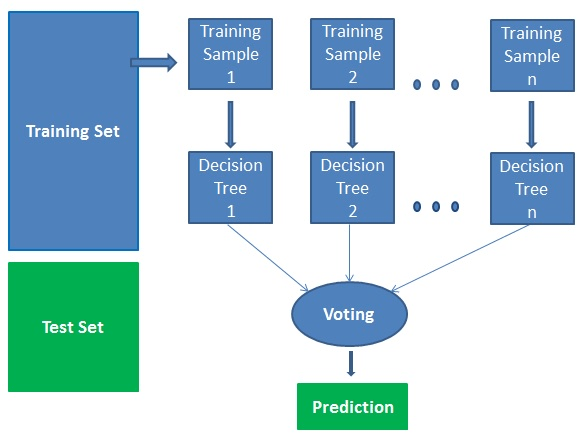

### Finding important features

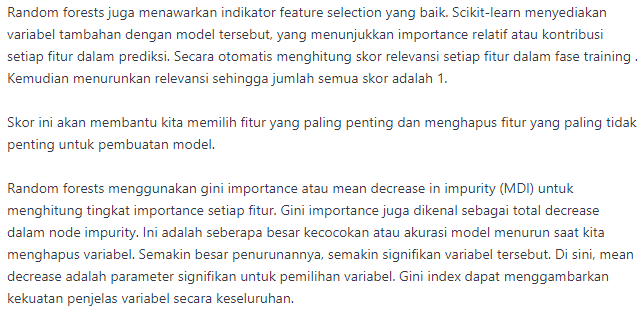

### Random Forests vs Decision Tree

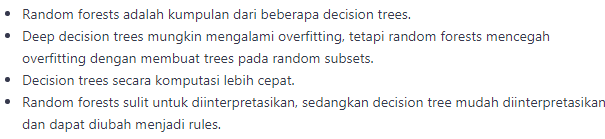

### Building a Classifier using Scikit-Learn

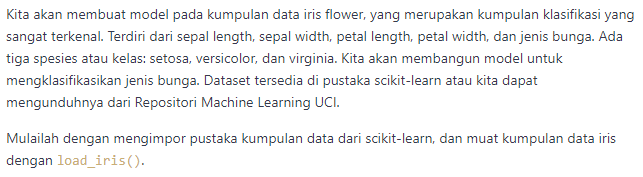

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

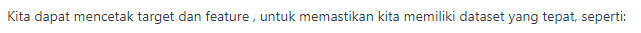

In [4]:
# Print the label species (setosa, versicolor, virginica)
print(iris.target_names)

# Print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


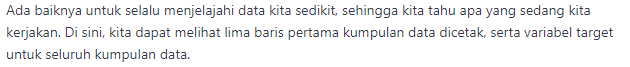

In [5]:
# Print the iris data (top 5 records)
print(iris.data[:5])

# Print the iris labels (0: setosa, 1: versicolor, 2: virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# Creating a Dataframe of given iris dataset
import pandas as pd

In [20]:
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


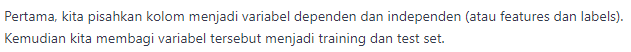

In [21]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']] # Features
y = data['species'] # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # 70% training & 30% test

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

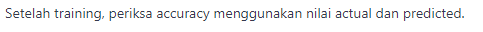

In [25]:
from sklearn import metrics

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9777777777777777


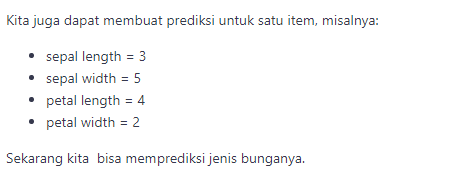

In [26]:
clf.predict([[3, 5, 4, 2]])

C:\Python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

### Finding Important Features in Scikit-learn 

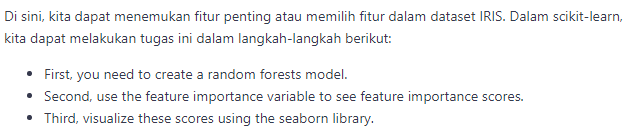

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

feature_imp

petal length (cm)    0.488232
petal width (cm)     0.396312
sepal length (cm)    0.084679
sepal width (cm)     0.030777
dtype: float64

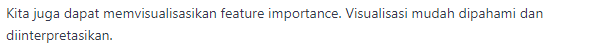

No handles with labels found to put in legend.


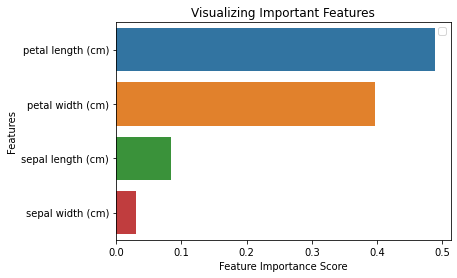

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.legend()
plt.show()

### Generating the model on Selected Features
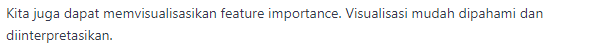

In [31]:
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X = data[['petal length', 'petal width', 'sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.70, random_state=5)

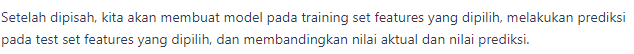

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test
y_pred = clf.predict(X_test)

In [34]:
from sklearn import metrics

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9523809523809523


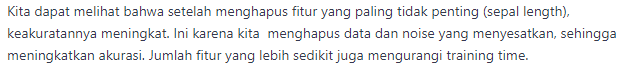

## SVM 

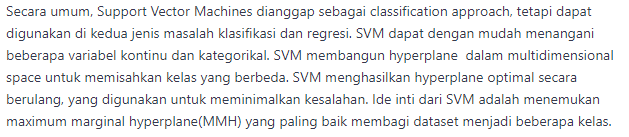

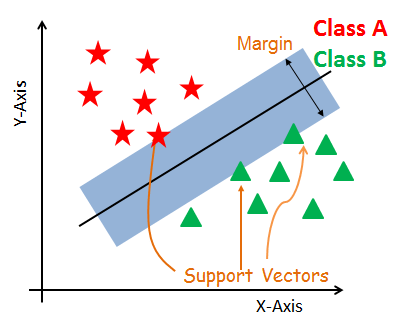

### Support Vectors

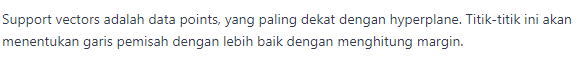

### Hyperlane

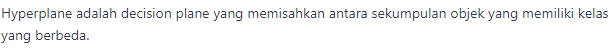

### Margin

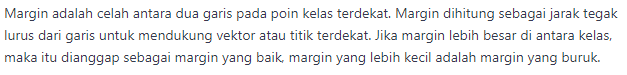

### How does SVM work

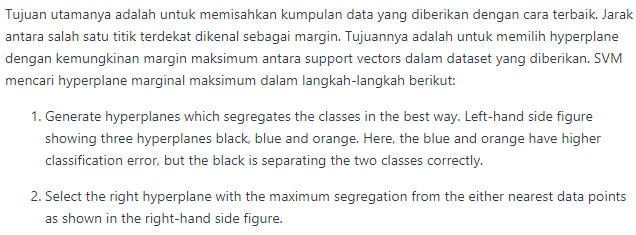

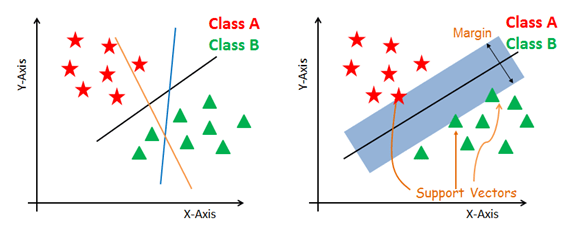

### Dealing with non-linear and inseparable planes

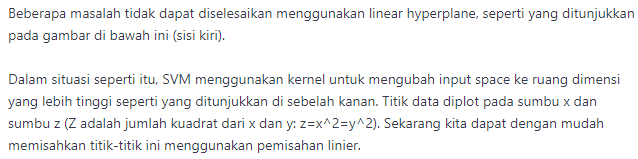

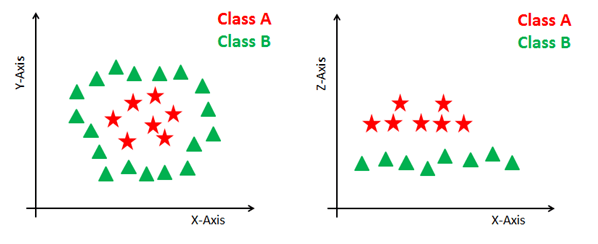

### SVM Kernel

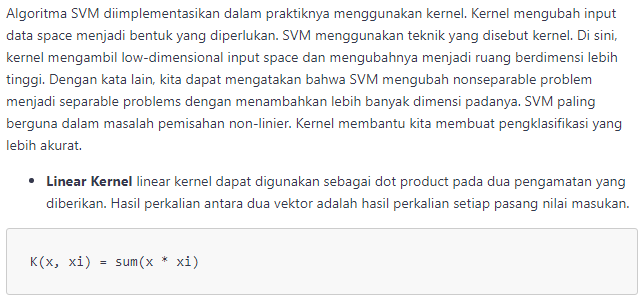

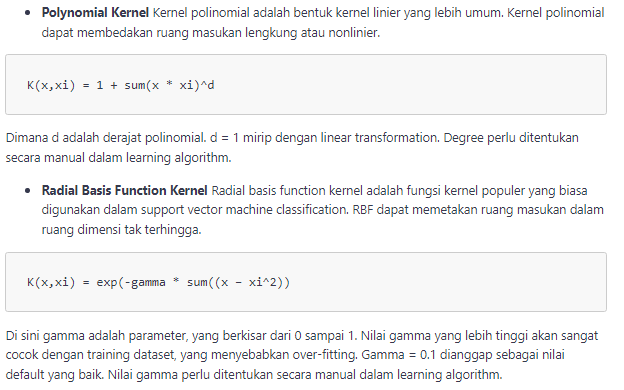

### Classifier Building in Scikit-learn

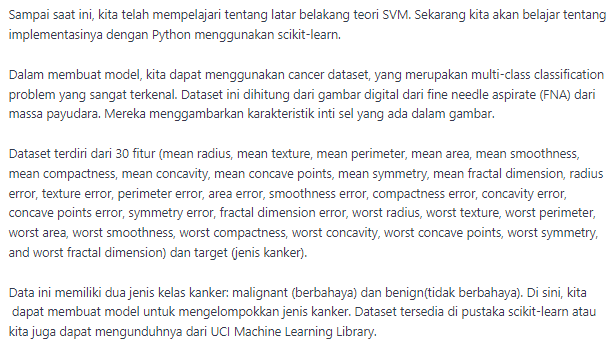

#### Loading Data



In [35]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

#### Exploring Data

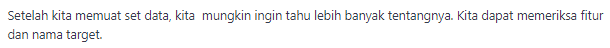

In [36]:
# Print the names of the 13 features
print("Features : ", cancer.feature_names)

# Print the label type of cancer (Malignant, Benign)
print("Label: ", cancer.target_names)

Features :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label:  ['malignant' 'benign']


In [37]:
cancer.data.shape

(569, 30)

In [38]:
# cancer data features (top 5 records)
print(cancer.data[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [39]:
# Cancer lavel (0: Malignant, 1: Benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

#### Splitting Data

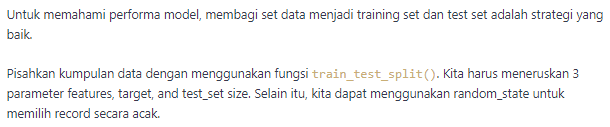

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=109)

#### Generating Model

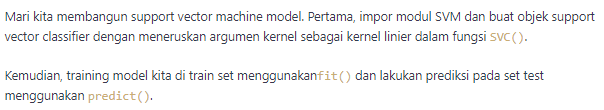

In [41]:
from sklearn import svm

# Create SVM Classifier
clf = svm.SVC(kernel='linear') # Linear kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the Model 

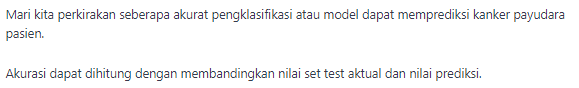

In [42]:
from sklearn import metrics

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9649122807017544


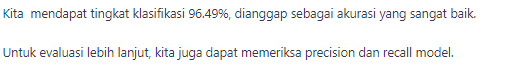

In [43]:
print("Precision : ", metrics.precision_score(y_test, y_pred))

print("Recall : ", metrics.recall_score(y_test, y_pred))

Precision :  0.9811320754716981
Recall :  0.9629629629629629


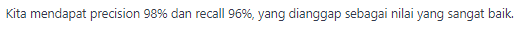

## Exercise : Multiple Algorithm on Dataset

In [44]:
import pandas as pd
import numpy as np

In [46]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [51]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [48]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
print("Train Data: ")
print(train.isnull().sum(), "\n")

Train Data: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [50]:
train.fillna(train.mean(), inplace=True)
train.isnull().sum()

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_7792/705823306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
train.Loan_Amount_Term = np.log(train.Loan_Amount_Term)

In [54]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_7792/1314552169.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train.drop('Loan_Status', 1)


In [55]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)

In [56]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [57]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=.2)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
pred_cv = model.predict(x_cv)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy : ", accuracy_score(y_cv, pred_cv))
matrix = confusion_matrix(y_cv, pred_cv)

print("Confusion Matrix : ", matrix)

Accuracy :  0.8292682926829268
Confusion Matrix :  [[15 20]
 [ 1 87]]


### Decision Tree Algorithm 

In [77]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
pred_cv1 = dt.predict(x_cv)

In [75]:
print("Accuracy : ", accuracy_score(y_cv, pred_cv1))

matrix1 = confusion_matrix(y_cv, pred_cv1)

print("Confusion Matrix : ", matrix1)

Accuracy :  0.7642276422764228
Confusion Matrix :  [[15 20]
 [ 9 79]]


### Random Forest Algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [79]:
pred_cv2 = rf.predict(x_cv)

In [80]:
print("Accuracy : ", accuracy_score(y_cv, pred_cv2))

matrix2 = confusion_matrix(y_cv, pred_cv2)

print("Confusion Matrix : ", matrix2)

Accuracy :  0.8130081300813008
Confusion Matrix :  [[13 22]
 [ 1 87]]


### Support Vector Machine (SVM) Algorithm

In [81]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [84]:
pred_cv3 = svm_model.predict(x_cv)

In [85]:
print("Accuracy : ", accuracy_score(y_cv, pred_cv3))

matrix3 = confusion_matrix(y_cv, pred_cv3)

print("Confusion Matrix : ", matrix3)

Accuracy :  0.7154471544715447
Confusion Matrix :  [[ 0 35]
 [ 0 88]]


### Naive Bayes Algorithm

In [86]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [87]:
pred_cv4 = nb.predict(x_cv)

In [88]:
print("Accuracy : ", accuracy_score(y_cv, pred_cv4))

matrix4 = confusion_matrix(y_cv, pred_cv4)

print("Confusion Matrix : ", matrix4)

Accuracy :  0.8211382113821138
Confusion Matrix :  [[17 18]
 [ 4 84]]


### K-Nearest Neighbor (KNN) Algorithm

In [89]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
pred_cv5 = KNN.predict(x_cv)

C:\Python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [91]:
print("Accuracy : ", accuracy_score(y_cv, pred_cv5))

matrix5 = confusion_matrix(y_cv, pred_cv5)

print("Confusion Matrix : ", matrix5)

Accuracy :  0.6097560975609756
Confusion Matrix :  [[ 6 29]
 [19 69]]


### Result 

In [93]:
print("Logistic Regression : ",  accuracy_score(y_cv, pred_cv))
print("Decision Tree : ",  accuracy_score(y_cv, pred_cv1))
print("Random Forest : ",  accuracy_score(y_cv, pred_cv2))
print("SVM : ",  accuracy_score(y_cv, pred_cv3))
print("Naive Bayes : ",  accuracy_score(y_cv, pred_cv4))
print("KNN : ",  accuracy_score(y_cv, pred_cv5))

Logistic Regression :  0.8292682926829268
Decision Tree :  0.7642276422764228
Random Forest :  0.8130081300813008
SVM :  0.7154471544715447
Naive Bayes :  0.8211382113821138
KNN :  0.6097560975609756


### Write test result in CSV file

In [94]:
predictions = pd.DataFrame(pred_cv2, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')